In [41]:
# 1. Apply PCA to reduce feature dimensionality while maintaining variance
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("../data/heart_disease_preprocessed.csv")
X = df.drop('num', axis=1)  # Features
y = df['num']  # Target
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")

Features: 22, Samples: 297


In [42]:
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(f"Total components available: {len(explained_variance)}")

Total components available: 22


In [43]:
# 2. Determine optimal number of components using explained variance ratio
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Components for 95% variance: {n_components_95}")
print(f"Dimensionality reduction: {X.shape[1]} → {n_components_95}")

# Apply optimal PCA
pca_optimal = PCA(n_components=n_components_95)
X_pca_final = pca_optimal.fit_transform(X)

Components for 95% variance: 13
Dimensionality reduction: 22 → 13


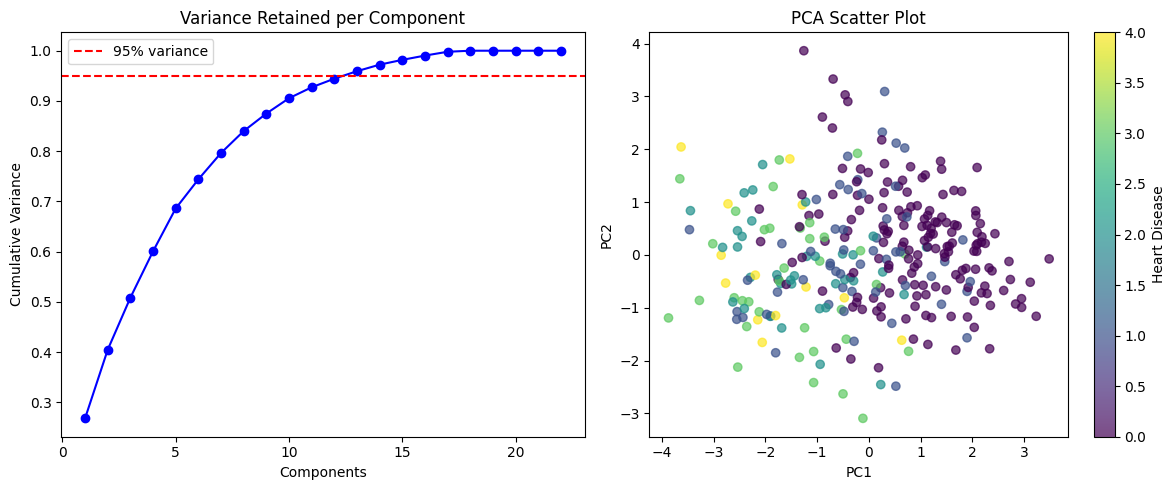

In [44]:
# 3. Visualize PCA results using scatter plot and cumulative variance plot
plt.figure(figsize=(12, 5))

# Cumulative variance plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Components')
plt.ylabel('Cumulative Variance')
plt.title('Variance Retained per Component')
plt.legend() # To show the legend indicating the variance's line

# PCA scatter plot (first 2 components)
plt.subplot(1, 2, 2)
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Heart Disease')

plt.tight_layout()
plt.show()

In [45]:
# Save PCA-transformed dataset
pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components_95)])
pca_df['num'] = y.values
pca_df.to_csv("../data/heart_disease_pca.csv", index=False)
print("PCA-transformed dataset saved")
print("Variance graphs created")
print(f"Final shape: {pca_df.shape}")

PCA-transformed dataset saved
Variance graphs created
Final shape: (297, 14)
